<h1 align=center><font size = 6>Predictive Regression Modeling of House Prices in King County, USA</font></h1>
<h1 align=center><font size = 4>by John Owusu Duah</font></h1>

# Purpose of Project
1. For constructive criticism/feedback that will lead to improvement.


2. When I was learning regression modeling using Python, I wish I had a reference that synthetisized all the concepts and code under the topic. Hence this has been published to illustrate synthesization of data science skills and concepts to help students and practitioners. The workflow, which is a key feature of this project, will be most beneficial to anyone who is struggling to synthesize and consolidate newly acquired skills and concepts. 

NB: "We" used extensibly in this notebook refers to John Owusu Duah and anyone who is yet to give constructive feedback on github.

# Problem: How does one predict the price of houses in King County, USA with dataset of house sales between May 2014 and May 2015?

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

<b>id</b> : A notation for a house

<b> date</b>: Date house was sold


<b>price</b>: Price is prediction target


<b>bedrooms</b>: Number of bedrooms


<b>bathrooms</b>: Number of bathrooms

<b>sqft_living</b>: Square footage of the home

<b>sqft_lot</b>: Square footage of the lot


<b>floors</b> :Total floors (levels) in house


<b>waterfront</b> :House which has a view to a waterfront


<b>view</b>: Has been viewed


<b>condition</b> :How good the condition is overall

<b>grade</b>: overall grade given to the housing unit, based on King County grading system


<b>sqft_above</b> : Square footage of house apart from basement


<b>sqft_basement</b>: Square footage of the basement

<b>yr_built</b> : Built Year


<b>yr_renovated</b> : Year when house was renovated

<b>zipcode</b>: Zip code


<b>lat</b>: Latitude coordinate

<b>long</b>: Longitude coordinate

<b>sqft_living15</b> : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area


<b>sqft_lot15</b> : LotSize area in 2015(implies-- some renovations)

Import python libraries need for data wrangling, visualization and regression modeling: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# 1.0 Importing and Understanding Data Sets 

 Load the csv:  

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


 
Display the data types of each column using the attribute df.dtypes to check if type of data in columns match the column labels. Any issue of wrong data type in column can be identified and rectified after this code is run.

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Take a cursory glance statistical summary of the dataframe

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can tell that our data has 21,613 row entries. We can also tell from the statistal summary that 'Unamed:0' and 'id' columns will not be useful for prediction modeling of house prices

# 2.0 Data Wrangling

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. 

This is done to remove redundant columns from the original dataframe.

In [6]:
df.drop(["id","Unnamed: 0"],axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


A common issue working with data is the occurrence of empty entries (otherwise recognized by Python as NaN or 0). There is the need to check the entire dataframe if there are empty entries. Panda's <code> pd.isnull()</code> helps to identify such entries

In [7]:
pd.isnull(df).sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We can see the the 'bedrooms' and 'bathrooms' columns have 13 empty entries. We approach this by considering if replacing the empty cells with the mean of the all the entries of the column would be more beneficial than deleting the rows with empty cells(with<code> dropna()</code>. 

In this case, we are dealing with the number of bedrooms and bathrooms, hence replacing the entries with mean values of the entire column would be more beneficial than deleting rows with empty entries in the 'bedrooms' and 'bathroom' columns. 

The larger our dataset is, the more accurate our prediction model is going to be. 

We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. We set the <code>inplace</code> parameter to <code>True</code> to store changes to the original dataframe: <code>df</code>.

In [8]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. 

In [9]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

We check to confirm if all the empty entries have been dealt with.

In [10]:
pd.isnull(df).sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 3: Exploratory Data Analysis

We carry out exploratory data analysis to acquire an intuitive understanding of our data, especially the correlation between the dependent(target) variable, which is house prices in this project, and independent(feature or predictor) variables.

We can use the method <code>value_counts</code> to count the number of houses with unique floor values and then use the method <code>.to_frame()</code> to convert it to a dataframe.


In [11]:
df_floors = df['floors'].value_counts().to_frame()
df_floors

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


We now know that our dataset consists of a majority of houses with one (1) floor.

We can use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.

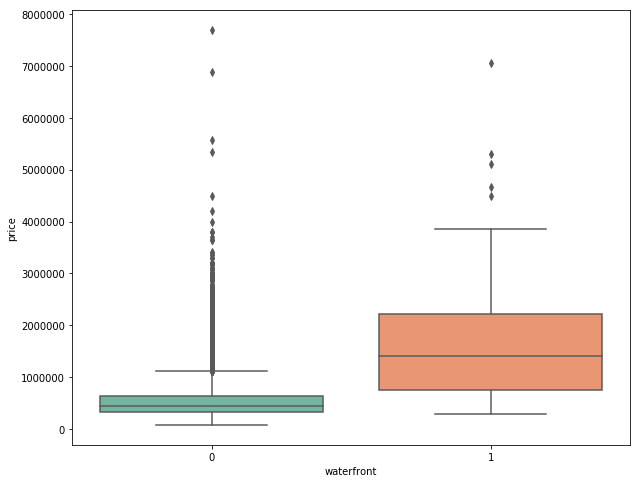

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="waterfront", y="price", data=df, palette="Set2")

Boxplot shows that houses without a waterfront view have more price outliers than houses without a waterfront view.

We can use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

(0, 8085761.552981762)

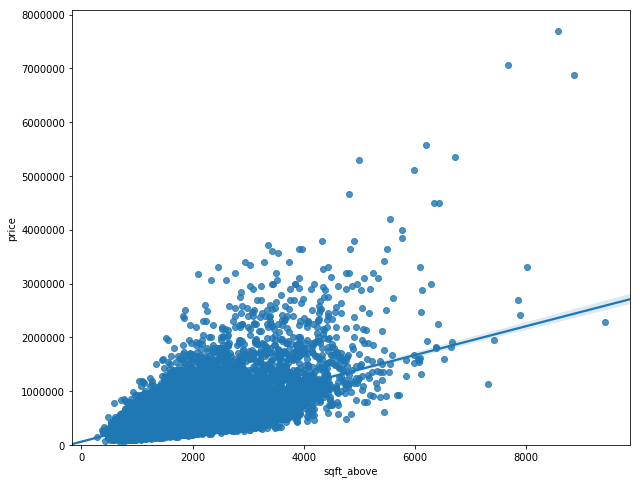

In [13]:
plt.figure(figsize=(10, 8))
sns.regplot(x="sqft_above", y="price", data=df)
plt.ylim(0,)

Seaborn regression plot shows that there is positive correlation between 'sqft_bove' and the 'price'.


#### Most importantly, when carrying out exploratory data analyis, it is vital that we determine the correlation between all the independent variables (features) and the dependent variable (target). 

In [14]:
corr_df = df.corr()['price'].sort_values(ascending=False).to_frame()
corr_df.index.name = 'feature'
corr_df

,price
feature,
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525738
view,0.397293
sqft_basement,0.323816
bedrooms,0.308797


This helps determine which independent variables to consider for model development. The higher the correlation is between an independent variable and the target variable, the higher the odds of generating an accurate model.

# 4: Model Development and Evaluation - In-sample Evaluation

### For demonstration purposes only, 100% of our data will be used as training data in this section (in-sample evaluation). In practice, this is not done because no data would be left with which we can evaluate our model. Als, reusing the same data for training and testing is a bad idea because we need to know how the method will work on data it was not trained on. However, in section 5 below, we will split our data for training and testing, in keeping with standard practice. Before we run simple and multiple linear regression analysis, we shoud determine if the relationship between the topmost correlated independent variables and the target variable is linear

We will use residual plots to do this.

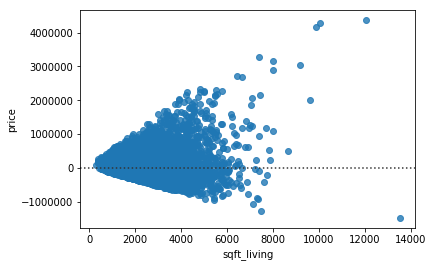

In [15]:
sns.residplot(x=df['sqft_living'], y=df['price'])

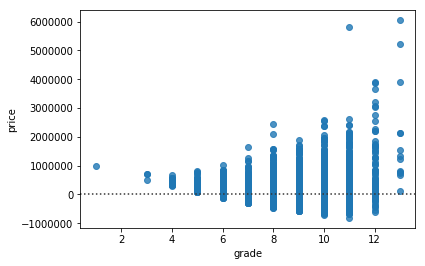

In [16]:
sns.residplot(x=df['grade'], y=df['price'])

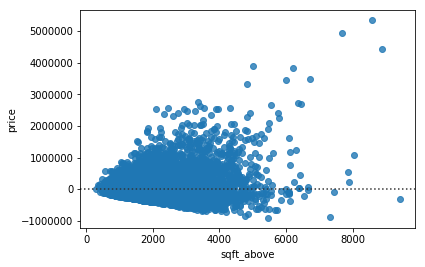

In [17]:
sns.residplot(x=df['sqft_above'], y=df['price'])

We can see that the data points are not distributed evenly around the x-axis with similar variance in all the residual plots. This suggests that the linear assumption is not correct. A polynomial assumption will be tested.

### Although we have proved that the relationship between the independent variables and the target variable is not linear, we will go ahead and determine the coefficient of determination (R^2) for different variables for demonstration purposes.

### Linear Regression with single independent variable

Test Simple Linear Regression with each possible independent variable and  caculate the respective Coefficient of determination (R^2).

In [18]:
R_square = []
indep_var_label = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms', 'view', 'sqft_basement', 
                 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15','yr_built',
                 'condition', 'long', 'zipcode']

for label in indep_var_label:
    X = df[[label]]
    Y = df['price']
    lm = LinearRegression()
    lm.fit(X,Y)
    R_square.append(lm.score(X, Y))

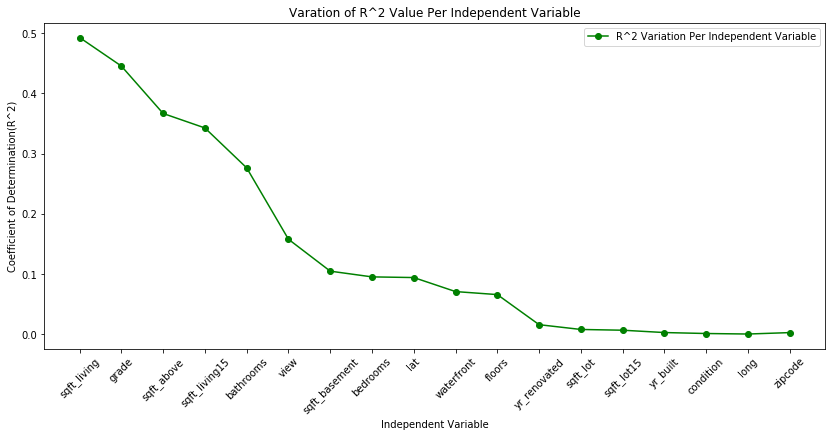

In [19]:
plt.figure(figsize=(14, 6))

ax = plt.subplot()
plt.plot(indep_var_label, R_square, color='g', marker='o', label='R^2 Variation Per Independent Variable')
ax.set_xticks(indep_var_label)
ax.set_xticklabels(indep_var_label, rotation=45)
plt.title('Varation of R^2 Value Per Independent Variable')
plt.xlabel('Independent Variable')
plt.ylabel('Coefficient of Determination(R^2)')
plt.legend()

The chart shows that the maximum coefficient of determination (R^2) using univariate linear regression to determine the target price is approximately 0.5. In other words, at best, 50% of the variability observed in the prices is accounted for by a single feature under a linear regression.

### Linear Regression with multiple independent variables

We select the top 5 independent variables that closely correlate with our target variable of price. Then we select determine the (R^2) value.

In [20]:
feat_top5 = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms'] 
X1 = df[feat_top5]
Y = df['price']
lm1 = LinearRegression()
lm1.fit(X1,Y)
R_mr1 = lm1.score(X1,Y)
print"The coefficient of determination (R^2) is", R_mr1

The coefficient of determination (R^2) is 0.5441584243667872


We can also run a linear regression with all the independent variables to check if we will get a higher R^2 score.

In [21]:
feat_all = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'sqft_lot', 'sqft_lot15','yr_built', 'condition', 'long', 'zipcode'] 
X2 = df[feat_all]
Y = df['price']
lm2 = LinearRegression()
lm2.fit(X2,Y)
R_mr2 = lm2.score(X2,Y)
print"The coefficient of determination (R^2) is", R_mr2

The coefficient of determination (R^2) is 0.6997513873758985


We can see that the coefficient of determination rises by 28.6% to 0.699 when we run linear regression with all the independent variables. 

Although this is a marked improvement, we should remember that the residual plots proved that the relationship between the independent variables and target variable is not linear.

Distribution plots are very useful in determining how accurately our model predicts the target variables with multiple linear regressions when dealing with continuous data. We will plot a distribution plot to visualize the difference between the frequency of occurrence of the actual target variables and the predicted values from the model using all predictor variables

[(0, 4000000)]

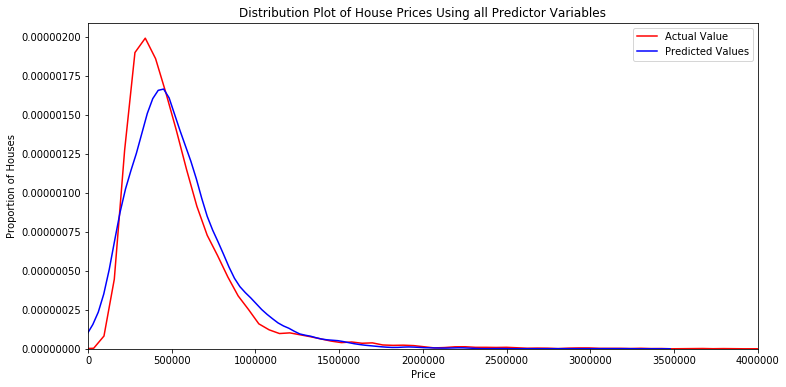

In [22]:
# Predict the Target Variables for Each Row of Independent Variables Using the Model That Has Just Been Generated
Y_predict2 = lm2.predict(X2)

# Plot Distribution Plot for Multiple Linear Regression
plt.figure(figsize=(12,6))
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_predict2, hist=False, color='b', label='Predicted Values', ax=ax1)
plt.title('Distribution Plot of House Prices Using all Predictor Variables')
plt.ylabel('Proportion of Houses')
plt.xlabel('Price')
ax1.set(xlim=(0, 4000000))

The distribution plot reveals that our multiple linear regression model does not perform well for price ranges less than $500,000.00

## Polynomial Regression with Single Independent Variable 

We selected square footage of the home as our single independent variable because of its high correlation with house prices. We will define a function to plot our data and model.

In [23]:
def single_var_polyplot(model, indepen_var, depen_var, name):
    x_new = np.linspace(290, 13540, 100)
    y_new = model(x_new)

    plt.figure(figsize=(12,6))
    plt.plot(indepen_var, depen_var, '.', x_new, y_new, '-')
    plt.title('Polynomial Model with Single Predictor Variable')
    ax = plt.gca()
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('House Prices')
    plt.show()
    plt.close()

We will select our predictor and target variables and select a second order polynomial model to fit to our data.

In [24]:
x = df['sqft_living']
y = df['price']

# We will consider a 7th order polynomial (cubic) model. We shall fit the polynomial to our data using 
# *polyfit* function and then use the *poly1d* function to display it.
seventh_order_func = np.polyfit(x, y, 7)
seventh_order_model = np.poly1d(seventh_order_func)
print(seventh_order_model)

           7             6             5            4            3
5.517e-21 x - 3.389e-16 x + 7.233e-12 x - 7.15e-08 x + 0.000355 x
           2
 - 0.8343 x + 1032 x - 1.617e+05


We will plot the model using the single_var_polyplot function defined above.

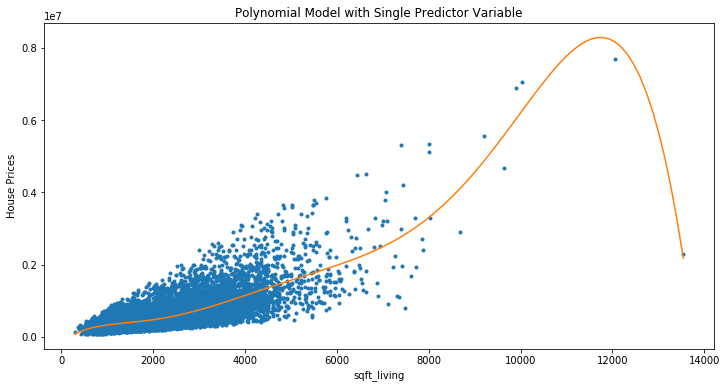

In [25]:
single_var_polyplot(seventh_order_model, x, y, 'sqft_living')

From the visualization, we notice that our data is skewed when we consider only the predictor value of square footage of the house, even though the seventh order fits even outliers of the data. This may suggest that the single predictor variable of square footage of the house does not generate an accurate model. 

We will try another predictor variable. This time, the overall grade given to the housing unit, based on King County grading system.

In [26]:
x1 = df['grade']
y1 = df['price']

# We will consider a 7th order polynomial (cubic) model. We shall fit the polynomial to our data using 
# *polyfit* function and then use the *poly1d* function to display it.
seventh_order1_func = np.polyfit(x1, y1, 7)
seventh_order1_model = np.poly1d(seventh_order1_func)
print(seventh_order1_model)

       7         6        5             4             3             2
8.391 x - 400.2 x + 7864 x - 8.175e+04 x + 4.813e+05 x - 1.569e+06 x + 2.528e+06 x - 1.229e+06


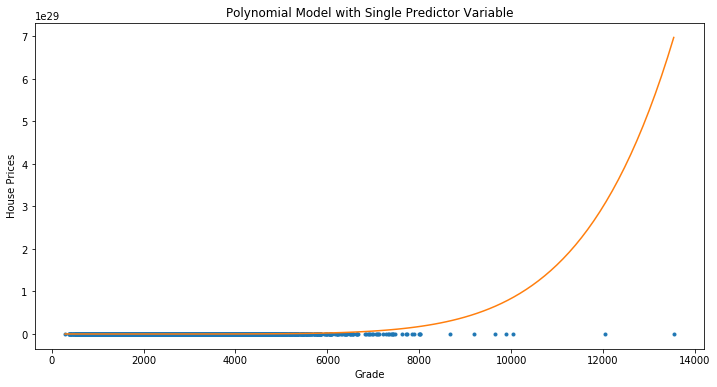

In [27]:
single_var_polyplot(seventh_order1_model, x, y, 'Grade')

We notice that the performance of our model has direct proportional relationship with the correlation between our target variable and predictor variables. The lower the correlation between the single independent variable and the target variable, the poorer the performance of the polynomial model with that single predictor variable.

We will proceed and investigate whether polynomial regressions with multiple independent variable will yield more accurate prediction models.

## Polynomial Regression with Multiple Independent Variables (ie. multiple independent variables)

### Pipelines

What do we do when a linear model and a univariate polynomial model is not the best fit for our data? We evaluate our data using multivariate polynomial regression. This involves transforming our data into a polynomial and using linear regression to fit the data. However, this is convulated process for more than one independent variable hence, pipelines are employed to simplify our code and make it efficient.

Pipelines are employed to simplify long-winded code involving normalization, transforming and model generation using linear regression.

Structurally, pipelines consist of a list of tuples. The first element in the tuple contains the name of the estimator and the second element contains the the model constructor:

Estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

Model Constructor: 

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

The default degree parameter of <code>PolynomialFeatures</code> is 2 so it is not necessary to include it but it has been included for demonstration purposes only.

In [28]:
Pipeline_Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]

We will use the list - 'Input' to create a pipeline object to predict house prices, fit the object using the top five correlated variables (see <code>feat_top5()</code> above). We iterate through different orders of the polynomial function to determine which order will yield the highest coefficient of determination (R^2). 

In [31]:
R_square_pipe = []
feat_top5 = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms'] 
poly_order = range(2,10)

for n in poly_order:
    Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=n)),('model',LinearRegression())]
    pipe = Pipeline(Input)
    pipe.fit(df[feat_top5], df['price'])
    R_pipe = pipe.score(df[feat_top5], df['price'])
    R_square_pipe.append(R_pipe)

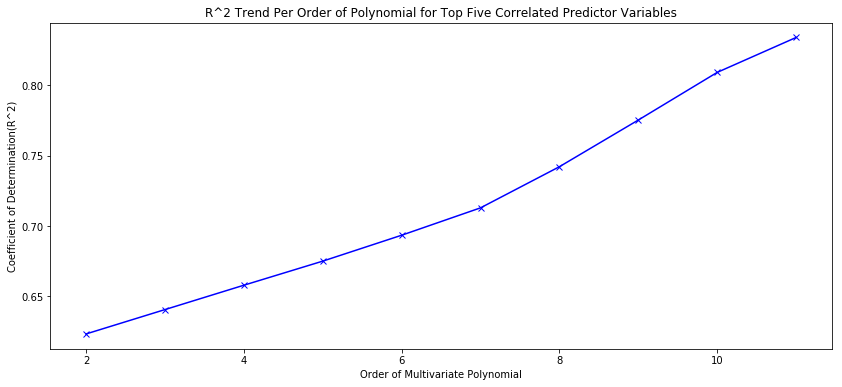

In [34]:
plt.figure(figsize=(14, 6))

ax = plt.subplot()
plt.plot(poly_order, R_square_pipe, color='blue', marker='x', label='Coefficient of Determination (R^2)')
plt.title('R^2 Trend Per Order of Polynomial for Top Five Correlated Predictor Variables')
plt.xlabel('Order of Multivariate Polynomial')
plt.ylabel('Coefficient of Determination(R^2)')
plt.show()

NB: We had the capacity to only evaluate up to a tenth (10th) order multivariate using a laptop in Ghana.
Orders higher than ten resulted in long processing times. 

Nevertheless, the visualation from our multivariate polynomial shows that the higher the order of polyninomial, the better our model performs. As a result a tenth(10th) order multivariate regression using the top five correlated variables yields a coefficient of determination of approximately 0.81.

This means that with a 10th order polynomial regression, 81% of the variation in house prices can be explained by top five(5) correlated predictor variables.

#### NB: The more variables you choose to train a polynomial regression model, the more computing capacity you need to have.

# Module 5: Model Evaluation and Refinement

Import the necessary modules:

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:

In [1]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

NameError: name 'df' is not defined

### Question 9
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 


In [33]:
from sklearn.linear_model import Ridge

In [34]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_train, y_train)

0.6594378534950239

### Question 10
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [35]:
PolyModel = PolynomialFeatures(degree=2)
x_train_transf = PolyModel.fit_transform(x_train)
x_test_transf = PolyModel.fit_transform(x_test)

RidgeModel1 = Ridge(alpha=0.1)
RidgeModel1.fit(x_train_transf, y_train)
RidgeModel1.score(x_test_transf, y_test)

0.7002744265621706

<p>Once you complete your notebook you will have to share it. Select the icon on the top right a marked in red in the image below, a dialogue box should open, and select the option all&nbsp;content excluding sensitive code cells.</p>
        <p><img width="600" src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/save_notebook.png" alt="share notebook"  style="display: block; margin-left: auto; margin-right: auto;"/></p>
        <p></p>
        <p>You can then share the notebook&nbsp; via a&nbsp; URL by scrolling down as shown in the following image:</p>
        <p style="text-align: center;"><img width="600"  src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/url_notebook.png" alt="HTML" style="display: block; margin-left: auto; margin-right: auto;" /></p>
        <p>&nbsp;</p>

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 